We start by importing the packages that we could need

In [24]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense,Dropout
import os
from PIL import Image
import pickle

We load the embedded(Using face_recognition) data that is stored in the dictionary .

In [25]:
Dict=pickle.load(open("Embeddings.pkl",'rb'))

Let's take the case of the  "Rafael Benitez" folder and see how the points are placed in the space.

In [26]:
name="rafael benítez"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        X[i]=Dict[name][i][0]
    else :
        print("Élément {} est vide".format(i))
        X[i]=np.zeros((128))



    
    

Élément 42 est vide


We obtain a training set X of size (the number of pictures in the folder,128) on the chosen folder.

In [27]:
print("The size of X: ",X.shape)
print("The number of pictures in the folder: ",num_pictures)
print("The output dimension of Face_recognition: ",Dict[name][0][0].shape[0])

The size of X:  (53, 128)
The number of pictures in the folder:  53
The output dimension of Face_recognition:  128


Let's reduce the dimension of our points to be able to see them in 2D.
For that, we use PCA (Principal Component Analysis) that is a massively used dimension reduction algorithm.
We use the implementation that is in the library Sickit-learn

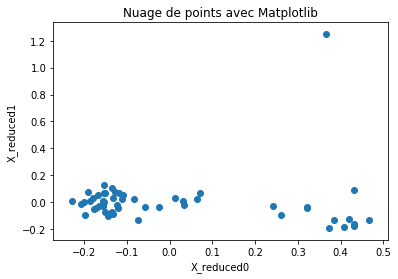

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.title('Nuage de points avec Matplotlib')
plt.xlabel('X_reduced0')
plt.ylabel('X_reduced1')
plt.show()

(53, 3)


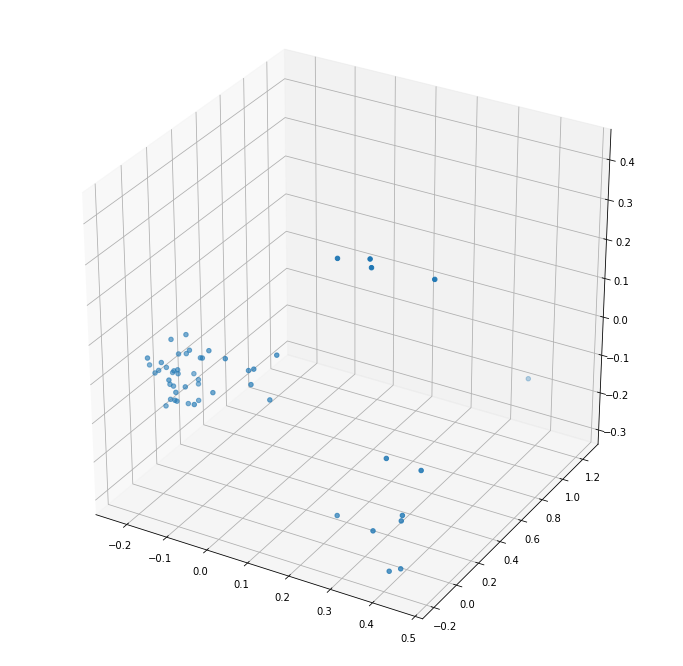

In [29]:
pca=PCA(n_components=3)
X_reduced=pca.fit_transform(X)
print(X_reduced.shape)

plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),np.array(X_reduced[:,2]))

We see that in 2D we can see two clusters and we assume that benitez is quite well recognized from outliers as he is represented by the majoritary cluster.
We therefore have two possible explanations:

-Either the embedding made by Face_recognition cannot differentiate our real person from outliers.

-Or the projection in 2D made us loose much information and therefore this representation doesn't allow to see outliers visually.

Let's  try to find a better low dimensional representation.
We use another algorithm  from the Sickit-learn to visualize the data that is T-SNE.


Nombre d'itérations :  2199


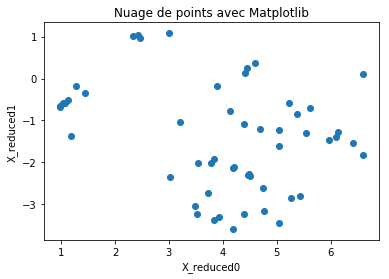

In [35]:
from sklearn.manifold import TSNE
plt.figure()
Dim_reductor=TSNE(n_components=2,n_iter=3000)
X_reduced=Dim_reductor.fit_transform(X)
print("Nombre d'itérations : ", Dim_reductor.n_iter_)
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.title('Nuage de points avec Matplotlib')
plt.xlabel('X_reduced0')
plt.ylabel('X_reduced1')
plt.show()

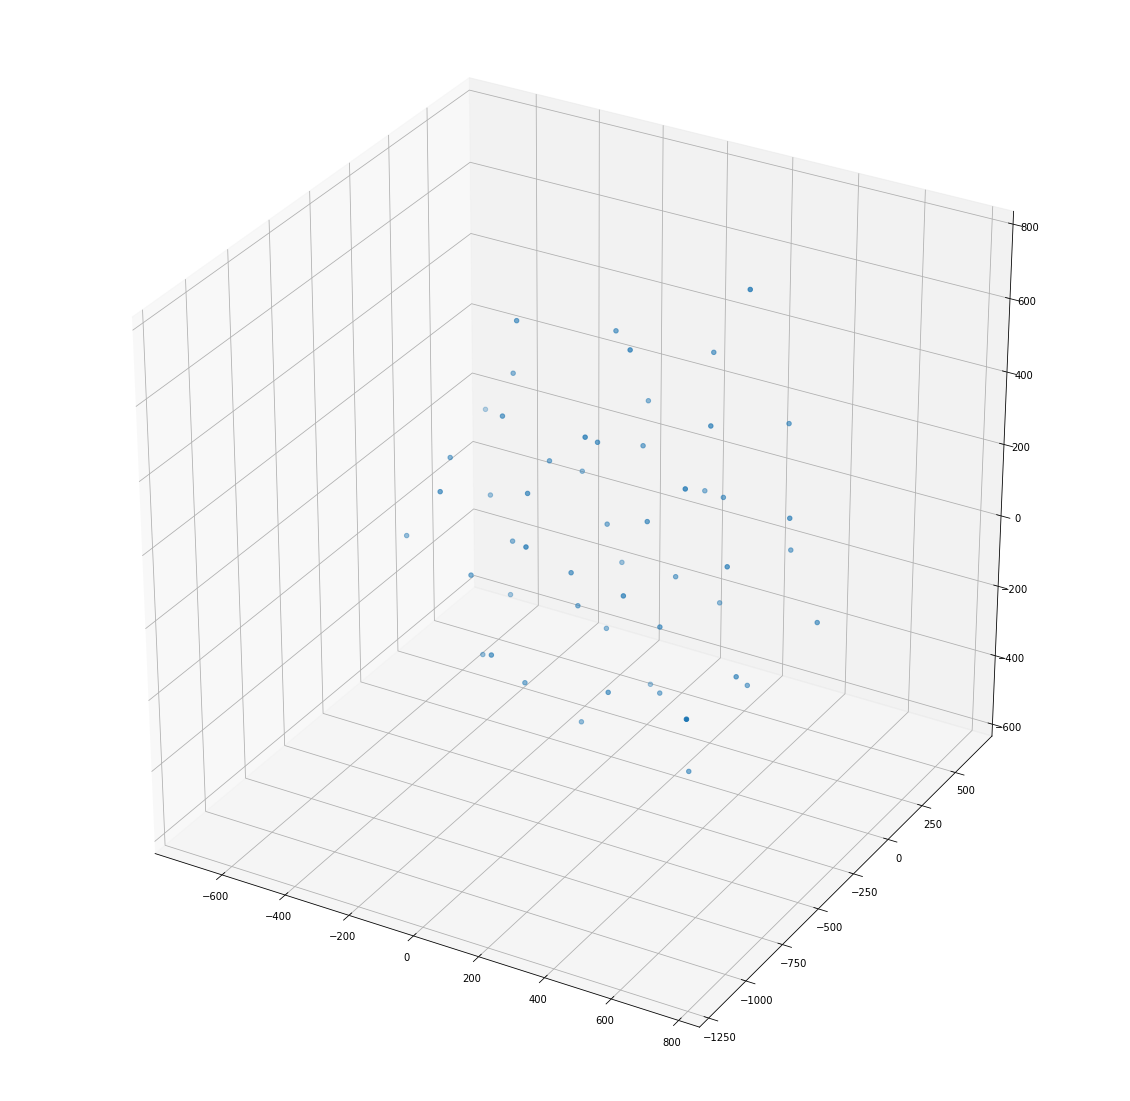

In [36]:
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(20,20))
Dim_reductor=TSNE(n_components=3,n_iter=3000)
X_reduced=Dim_reductor.fit_transform(X)
ax = plt.axes(projection='3d')
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),np.array(X_reduced[:,2]))

We see that using t-SNE's representation isn't a good idea for 2D visualisation as the data is hardly separable by sight.

Now en analyze the pictures in the folder of Rafael benitez 

therefore let's try to find 2 clusters in our data.A cluster for rafael Benitez and a cluster for other people.
if we can succed in seeing those clusters then our data is separable.


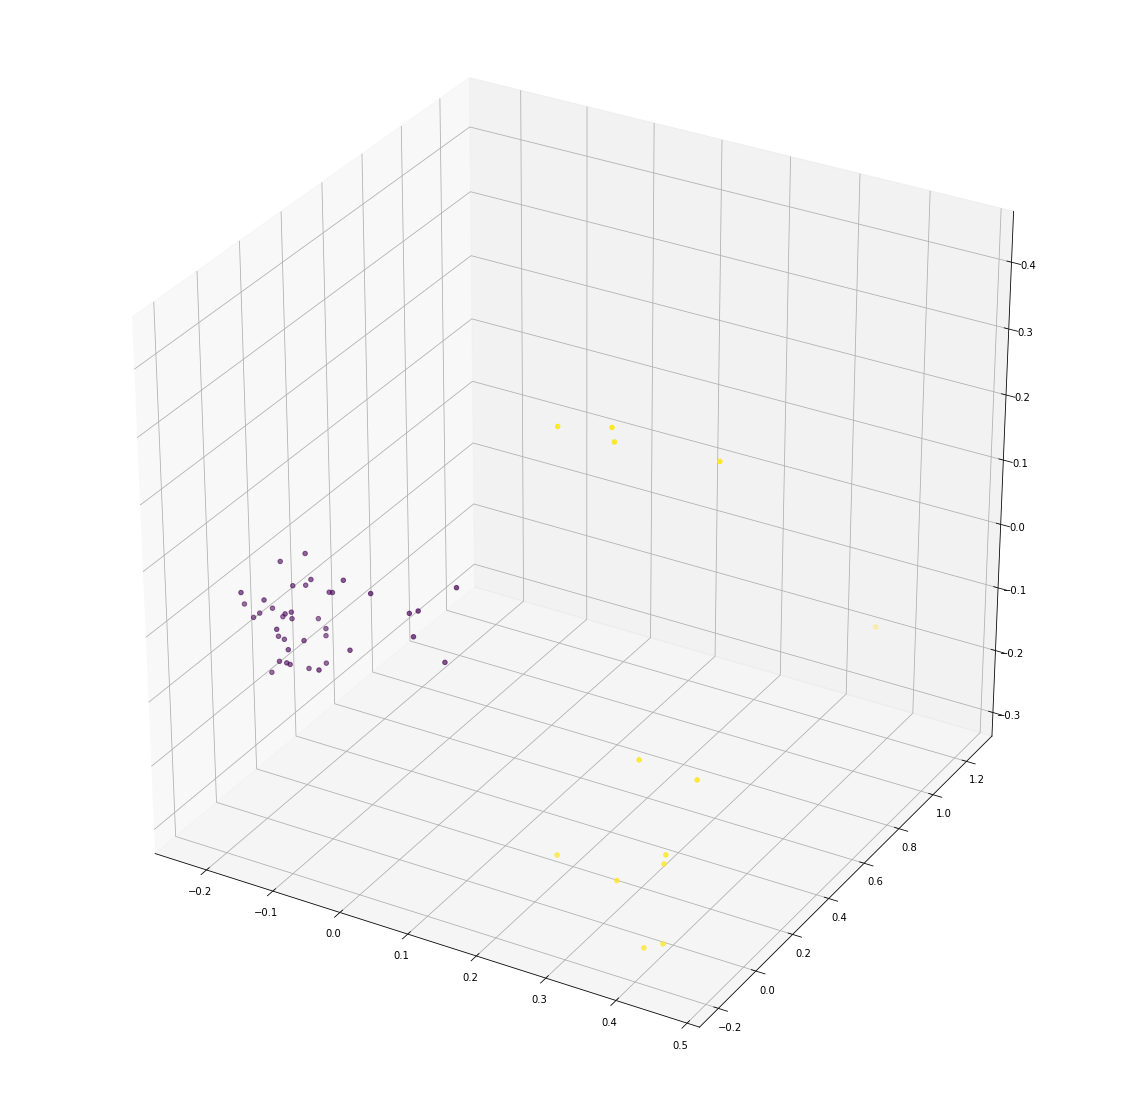

In [37]:
pca=PCA(n_components=3)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2)
cluster.fit(X)
Y=cluster.predict(X)
ax = plt.axes(projection='3d')
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),np.array(X_reduced[:,2]),c=Y)



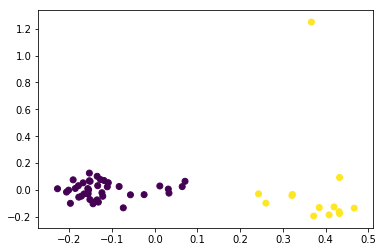

In [38]:
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=Y)

We find the majoritary cluster

In [40]:
print("The population of classes: "+str(np.bincount(Y)))
print("The majoritary class is :  "+str(np.argmax(np.bincount(Y))))

The population of classes: [40 13]
The majoritary class is :  0


On essaie de verifier les outliers trouvés par cette methode.

In [41]:
X_outlier=X[Y==0]
print(X_outlier.shape)


(40, 128)


13 is exactly the number of outliers that we detected by hand on the folder Rafael Benitez.
Therefore, a simple Kmeans applied to this folder helps detect all the outliers.
let's find a more challenging folder.
Let's try an extreme folder where we only have 2 outliers in 142 pictures.
name of the folder: ben rhodes

Élement vide : 50
Élement vide : 65
Élement vide : 67
Élement vide : 77


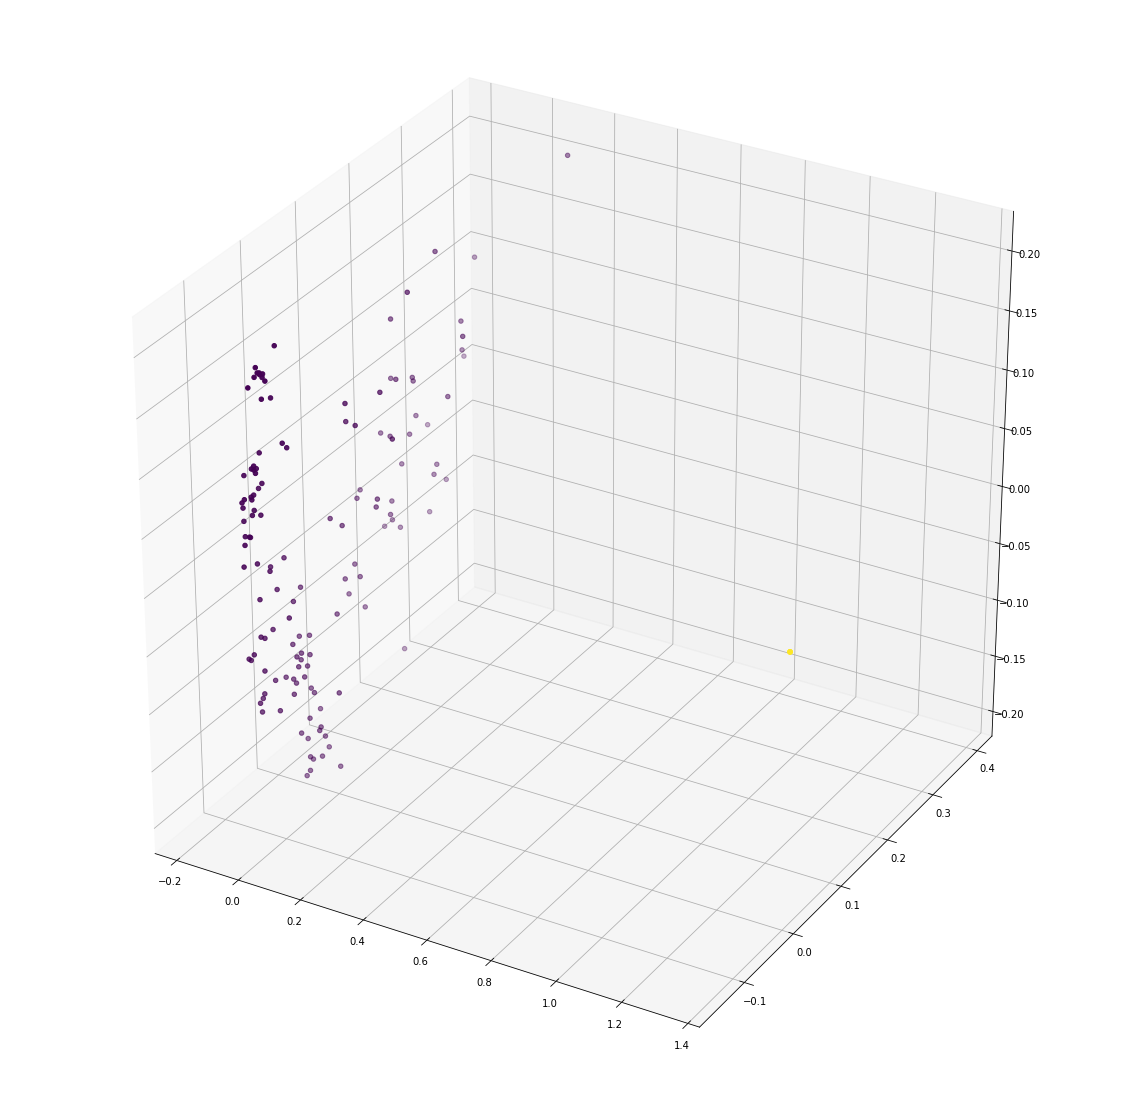

In [43]:
name="ben rhodes"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        
        X[i]=Dict[name][i][0]
    else:
        print("Élement vide : {}".format(i))
        X[i]=np.zeros((128))
pca=PCA(n_components=3)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2)
cluster.fit(X)
Y=cluster.predict(X)
ax = plt.axes(projection='3d')
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),np.array(X_reduced[:,2]),c=Y)

In [44]:
print("The population of classes: "+str(np.bincount(Y)))
print("The majoritary class is :  "+str(np.argmax(np.bincount(Y))))


The population of classes: [138   4]
The majoritary class is :  0


We found 4 outliers mainly due to pictures considered by face_recognition as not containing any face.


We try a folder where there's no outliers and we hope to find one consistent cluster

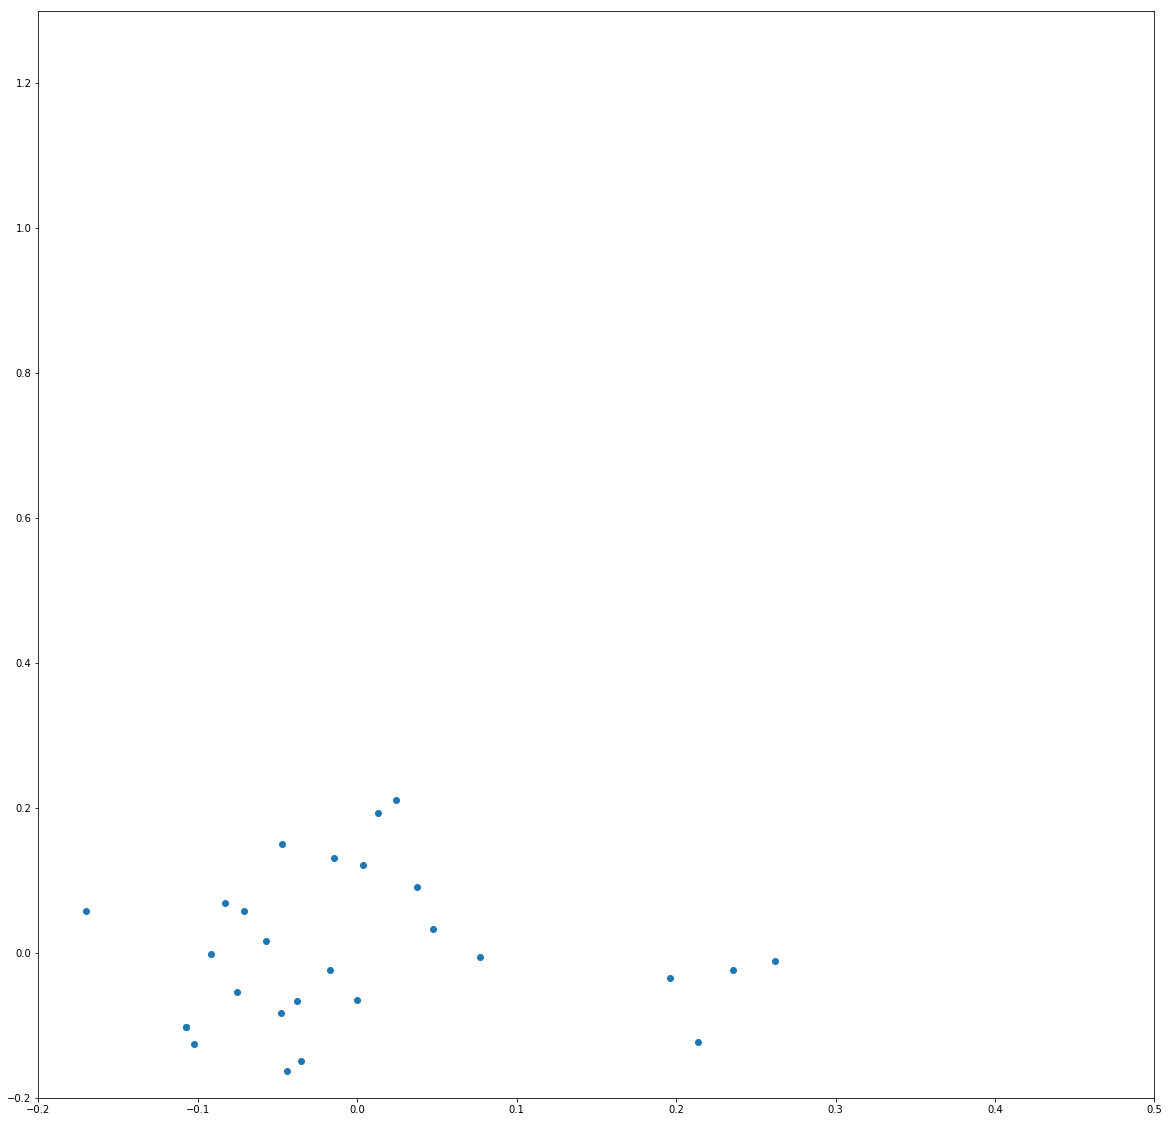

In [45]:
name="constance wu"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))
plt.figure(figsize=(20,20))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        
        X[i]=Dict[name][i][0]
    else:
        print("vide")
        X[i]=np.zeros((128))
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.axis((-0.2,0.5,-0.2,1.3))
plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]))

We see that we get a big cluster but there are still some points that are far from the center and therefore can be interpreted as outliers by some clustering algorithm and that makes us question the embedding given by face_recognition.Maybe we could try another encoder for our pictures.
Let's see what happens when we apply a clustering algorithm with 2 clusters.

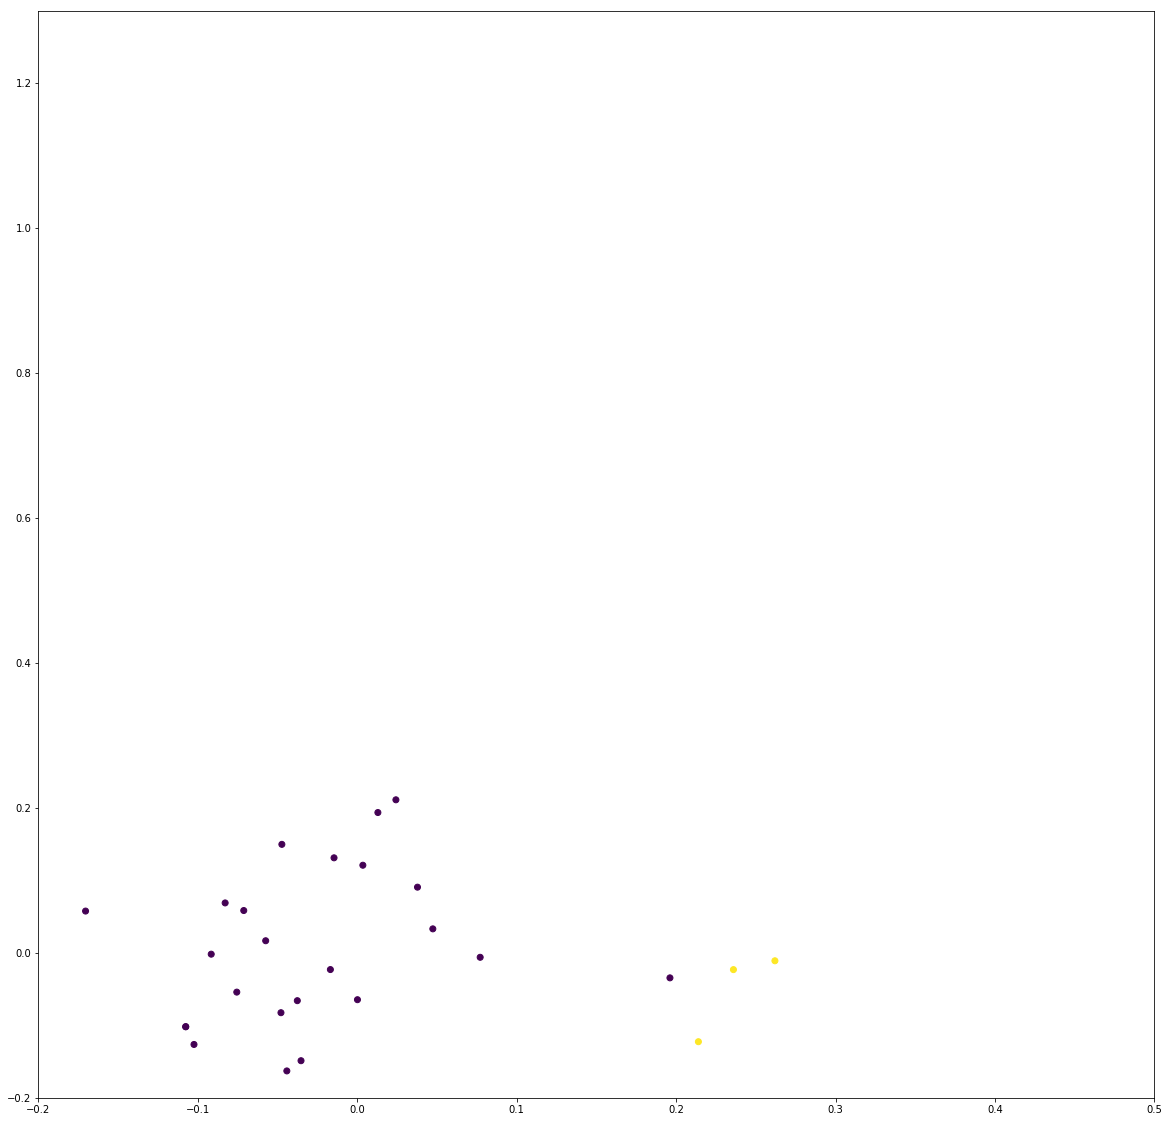

In [46]:
name="constance wu"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        
        X[i]=Dict[name][i][0]
    else:
        print("vide")
        X[i]=np.zeros((128))
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2)
cluster.fit(X)
Y=cluster.predict(X)
plt.axis((-0.2,0.5,-0.2,1.3))
plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

As we guessed these points are classified as being outliers even if they are true pictures of the person.
Maybe we should try another encoder.

For the moment we will try visualiazing some other hard folders

In [47]:

name="princess anne"
X=np.zeros((num_pictures,128))
plt.figure(figsize=(20,20))
j=0
for photo in os.listdir("/home/maachou/ml/Projet S4/face-database/"+name):
    Dict[name][j]=face_recognition.api.face_encodings(face_recognition.load_image_file("/home/maachou/ml/Projet S4/face-database/"+name+"/"+photo))
    j+=1

num_pictures=len(Dict[name].keys())
for i in range(num_pictures):
    print(i)
    if Dict[name][i]!=[]:
        
        X[i]=Dict[name][i][0]
    else:
        print("vide")
        X[i]=np.zeros((128))
print(X.shape)
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/maachou/ml/Projet S4/face-database/princess anne'

<Figure size 1440x1440 with 0 Axes>

/home/lulwat/Frameworks/python_virtualenvs/computer_vision/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)


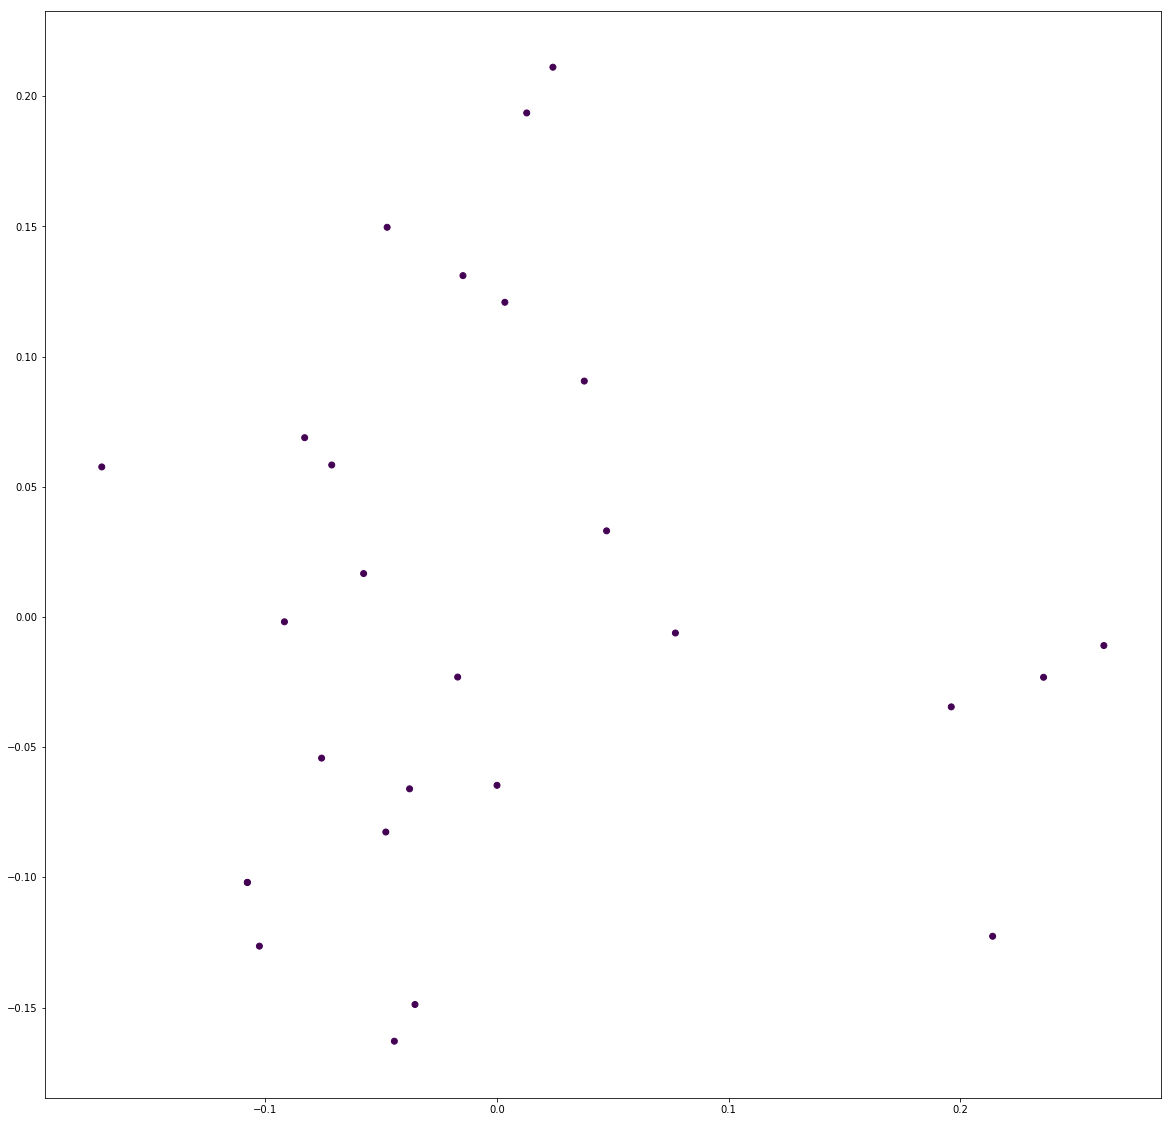

In [48]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2)
cluster.fit(X)
Y=cluster.predict(X)
plt.figure(figsize=(20,20))
plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

We see that the three points that we identified visually as outliers weren't all considered as so.Therefore we could think about another clustering algorithm.

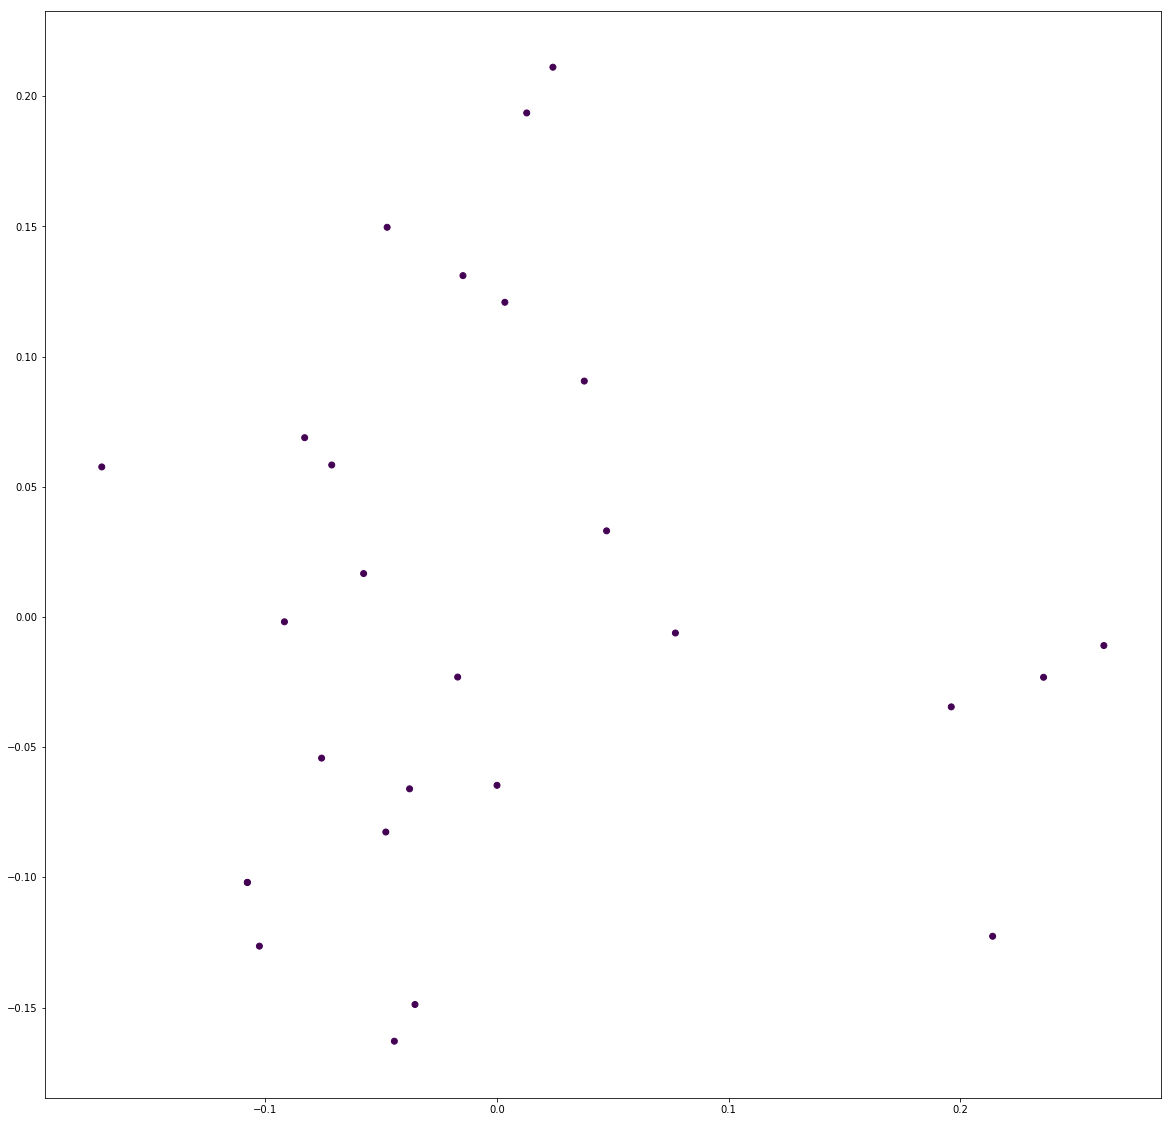

In [49]:
from sklearn.cluster import DBSCAN
cluster=DBSCAN()

Y=cluster.fit_predict(X)
plt.figure(figsize=(20,20))
plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

We get much better results using a more complex clustering algorithm like DBSCAN .
We can think that by finding some complex clustering algorithm we can hope to correct the problems with the Face_recognition encoding.

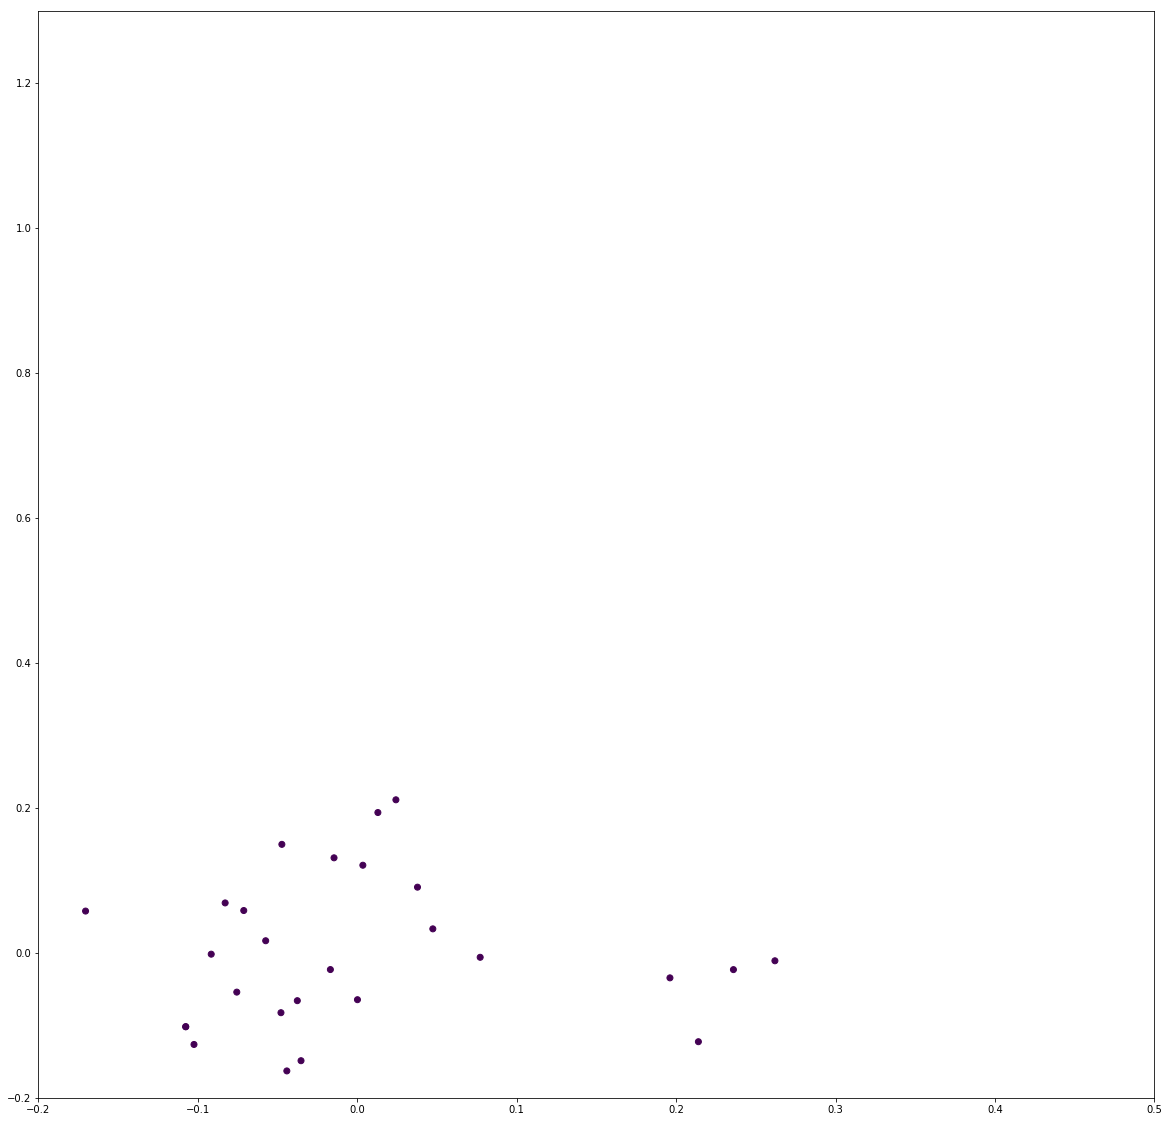

In [50]:
name="constance wu"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        
        X[i]=Dict[name][i][0]
    else:
        print("vide")
        X[i]=np.zeros((128))
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import KMeans
cluster=DBSCAN()

Y=cluster.fit_predict(X)
plt.axis((-0.2,0.5,-0.2,1.3))
plt.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

We see that using DBSCAN corrects the problem of the 4 points that were far from the main cluster in the folder where there are no outliers.

Conclusion of analysis:
-The encoding of face_recognition is causing some empty vectors as it doesn't recognize all our faces and therefore we should think about exploring the possibility of testing another encoder.
-For some folders the outliers are clearly separable .
-For some harder folders we can still explore some more complex clustering algorithm like DBSCAN and try optimize their hyper parameters for our problem.